<a href="https://colab.research.google.com/github/wsonguga/SensorAI/blob/main/tutorials/tutorial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content**

**Clustering**
* Affinity Propagation
* DBSCAN
* Heirarchical Clustering
  <ul>
  <li>Agglomerate</li>
  <li>Feature Agglomeration</li>
  </ul>
* OPTICS
* K Means
  <ul>
  <li>K Means</li>
  <li>Bisecting K Means</li>
  <li>Kernel K Means</li>
  <li>Mini Batch K Means</li>
  <li>Time Series K Means</li>
  <li>K Shape</li>
  </ul>
* Mean Shift
* Spectral

**Anomaly Detection**
  
  * Outlier Detection
    <ul>
    <li>Local Outlier Detection</li>
    </ul>
  
  * Novelty Detection
    <ul>
    <li>Elliptic Envelope</li>
    <li>Isolation Forest</li>
    <li>Local Outlier Detection for Novelties</li>
    <li>One Class Support Vector Machine</li>
    <li>Stochastic Gradient Descent One Class Support Vector Machine</li>
    </ul>

# Using Google Colab with Tutorial

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [1]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

Cloning into 'SensorAI'...
remote: Enumerating objects: 1567, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1567 (delta 25), reused 20 (delta 13), pack-reused 1518 (from 3)
Receiving objects: 100% (1567/1567), 454.76 MiB | 17.43 MiB/s, done.
Resolving deltas: 100% (893/893), done.


In [1]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

# Change to the tutorial repository
import os

os.chdir('SensorAI')

%ls             # display directory content

sample_data  SensorAI
bak/  data/  install.sh*  lib/  README.md  requirements.txt  tutorials/


In [2]:
# This command pulls any updated files from the repository
# This code segment may be re-executed at any point if there have been updates to the repository
!git pull https://github.com/wsonguga/SensorAI.git

From https://github.com/wsonguga/SensorAI
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [3]:
# INSTALL REQUIRED PACKAGES

!chmod +x install.sh  # Make the script executable
!./install.sh

# Clustering

Clustering is a type of unsupervised machine learning.  Clustering divides unlabeled data into groups, called clusters, based on varying types of similar data.  I.e. Data that is similar is clustered together.  Clustering originated in data mining, but has found use in other applications.

</br>

***SK Learn Clustering metrics usable with this tutorial:***

* 'adjusted_mutual_info_score'
* 'adjusted_rand_score'
* 'completeness_score'
* 'fowlkes_mallows_score'
* 'homogeneity_score'
* 'mutual_info_score'
* 'normalized_mutual_info_score'
* 'rand_score'
* 'v_measure_score'

Click **<a href="https://scikit-learn.org/stable/modules/model_evaluation.html">here</a>** for more information on these.

## Affinity Propogation

**References:**


1.   https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8
2.   https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/
3.   https://medium.com/@kevinkhang2909/advantages-and-disadvantages-of-each-algorithm-use-in-machine-learning-cb973d1aee15#:~:text=Strengths%3A%20The%20user%20doesn't,to%20scale%20to%20larger%20datasets.
4.   https://www.linkedin.com/pulse/affinity-propagation-exemplary-clustering-algorithm-yeshwanth-n-qdp9c?trk=article-ssr-frontend-pulse_more-articles_related-content-card

</br>

"Affinity Propagation was first published in 2007 by Brendan Frey and Delbert Dueck in Science. In contrast to other traditional clustering methods, Affinity Propagation does not require you to specify the number of clusters. In layman's terms, in Affinity Propagation, each data point sends messages to all other points informing its targets of each target's relative attractiveness to the sender. Each target then responds to all senders with a reply informing each sender of its availability to associate with the sender, given the attractiveness of the messages that it has received from all other senders. Senders reply to the targets with messages informing each target of the target's revised relative attractiveness to the sender, given the availability messages it has received from all targets. The message-passing procedure proceeds until a consensus is reached. Once the sender is associated with one of its targets, that target becomes the point's exemplar. All points with the same exemplar are placed in the same cluster."  <a href="https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8">[1]</a>

Exemplars a data point that best represents its respective cluster. <a href="https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/">[2]</a>

* The “responsibility” matrix R has values r(i, k) that quantify how well-suited xk is to serve as the exemplar for xi, relative to other candidate exemplars for xi. <a href="https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/">[2]</a>
* The “availability” matrix A contains values a(i, k) that represent how “appropriate” it would be for xi to pick xk as its exemplar, taking into account other points' preference for xk as an exemplar. <a href="https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/">[2]</a>

</br>

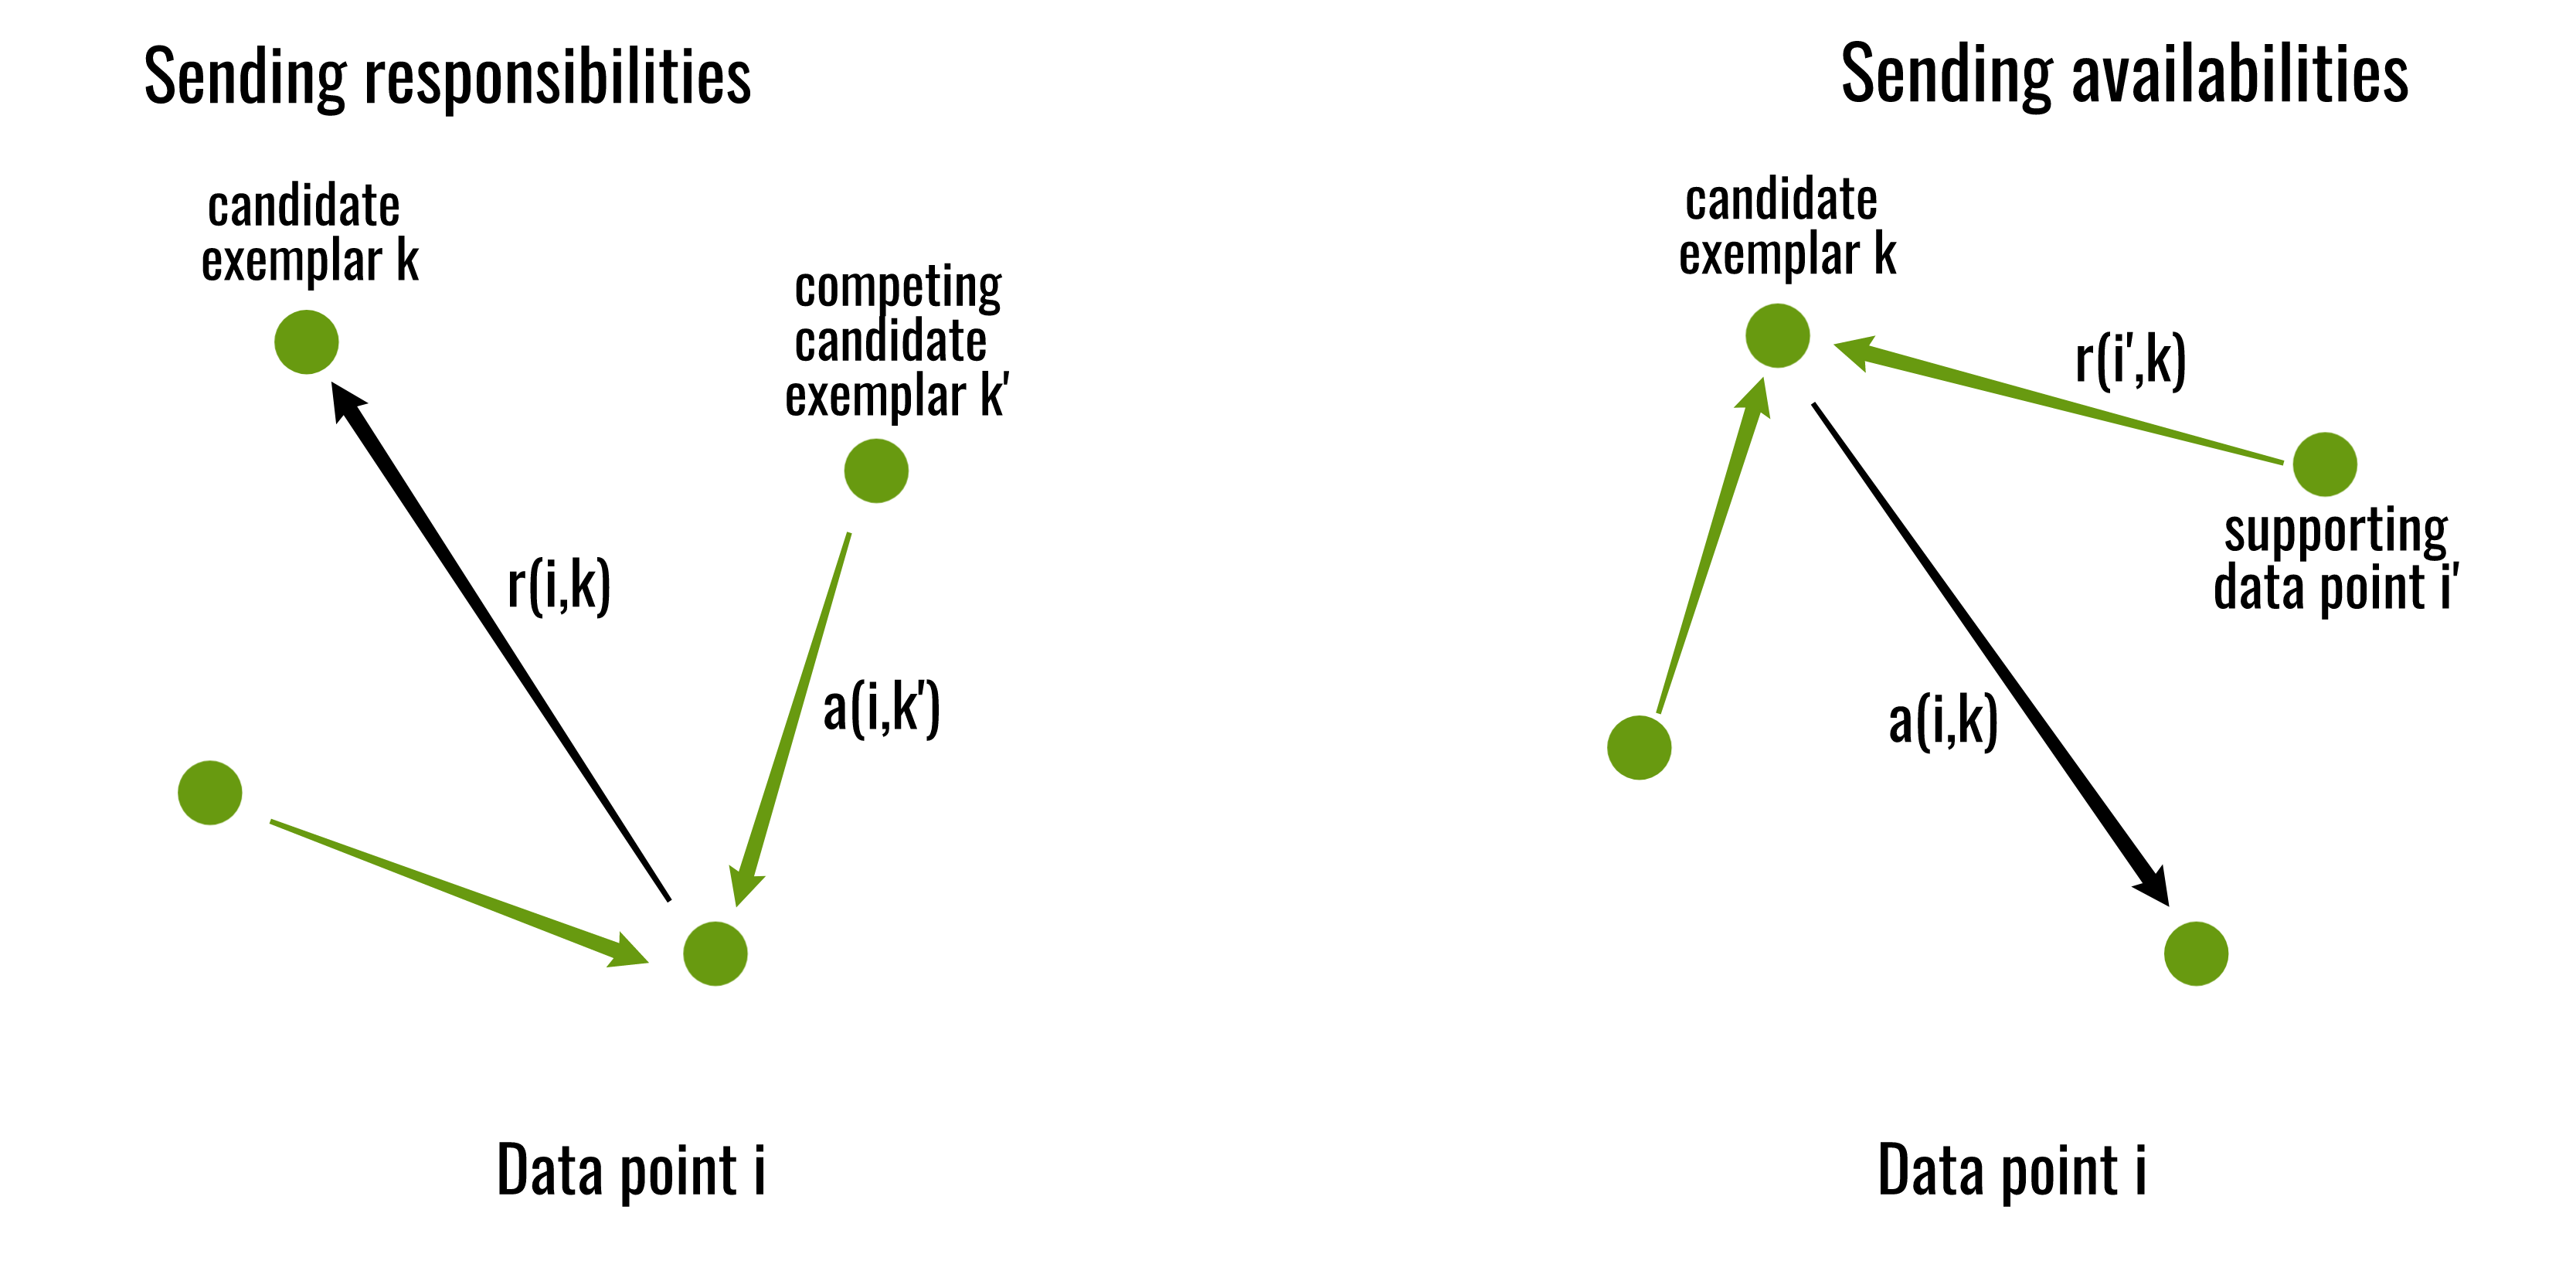
<figcaption>Figure from <a href="https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/">[2]</a></figcaption></center>

</br>

**Advantages**


*   User does not need to specify the number of clusters <a href="https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8">[1]</a>,
<a href="https://medium.com/@kevinkhang2909/advantages-and-disadvantages-of-each-algorithm-use-in-machine-learning-cb973d1aee15#:~:text=Strengths%3A%20The%20user%20doesn't,to%20scale%20to%20larger%20datasets.">[3]</a>
*   Identifies exemplars, which can provide insight into the structure of data <a href="https://www.linkedin.com/pulse/affinity-propagation-exemplary-clustering-algorithm-yeshwanth-n-qdp9c?trk=article-ssr-frontend-pulse_more-articles_related-content-card">[4]</a>



**Disadvantage**


*   Slow and memory heavy, thus not good for large datasets <a href="https://medium.com/@kevinkhang2909/advantages-and-disadvantages-of-each-algorithm-use-in-machine-learning-cb973d1aee15#:~:text=Strengths%3A%20The%20user%20doesn't,to%20scale%20to%20larger%20datasets.">[3]</a>
* User must secify *sample prefrence* and *damping* hyperparameters <a href="https://medium.com/@kevinkhang2909/advantages-and-disadvantages-of-each-algorithm-use-in-machine-learning-cb973d1aee15#:~:text=Strengths%3A%20The%20user%20doesn't,to%20scale%20to%20larger%20datasets.">[3]</a>
*   Assumes underlying clusters are globular <a href="https://medium.com/@kevinkhang2909/advantages-and-disadvantages-of-each-algorithm-use-in-machine-learning-cb973d1aee15#:~:text=Strengths%3A%20The%20user%20doesn't,to%20scale%20to%20larger%20datasets.">[3]</a>



In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=70)


n_classes = int(np.amax(y)+1)
print("number of clusters is ",n_classes)
# SETUP & RUN A GRIDSEARCH

#SK LEARN
affprop = skcl.pipeBuild_AffinityPropagation(damping=[0.95])

names=['Affinity Propogation']
pipes=[affprop]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_mutual_info_score',plot_number=3)

number of clusters is  3
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



Best parameter (CV score=-0.005):
{'affprop__affinity': 'euclidean', 'affprop__convergence_iter': 15, 'affprop__copy': True, 'affprop__damping': 0.95, 'affprop__max_iter': 200, 'affprop__preference': None, 'affprop__verbose': False}
Best adjusted_mutual_info_scorescore:  -0.005479581402387203
# of X's clusters is:  4
# of y's clusters is:  3


## Density Based Clustering![core-distance.webp](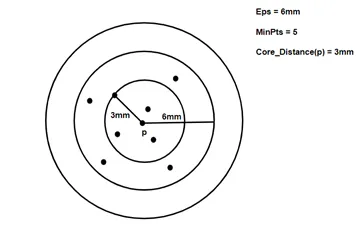![reachability-distance.jpg](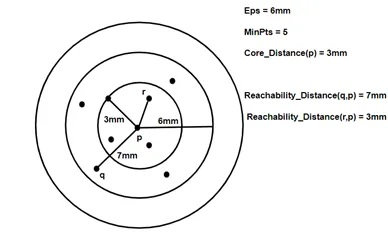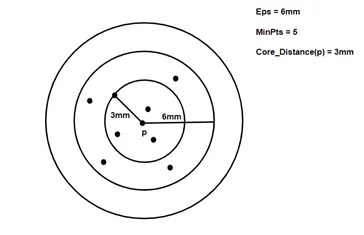))

### DBSCAN

</br>

**References:**
1. https://towardsdatascience.com/dbscan-with-python-743162371dca
2. https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d
3. https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf
4. https://medium.com/@tarammullin/dbscan-2788cfce9389
5. https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
6. https://sites.google.com/site/dataclusteringalgorithms/density-based-clustering-algorithm

</br>

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** clusters by measuring the distance each point is from one another.  If enough points are close enough together, then DBSCAN will classify it as a new cluster <a href="https://towardsdatascience.com/dbscan-with-python-743162371dca">[1]</a>.

The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density <a href="https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d">[2]</a>.

DBSCAN uses two paramaters to create clusters <a href="https://towardsdatascience.com/dbscan-with-python-743162371dca">[1]</a>:


1.   ***Epsilon*** — The maximum distance a point can be from another point to be considered a neighbor
2.   ***Min_Points*** — The amount of points needed within the range of epsilon to be considered a cluster

Three DBSCAN terms <a href="https://towardsdatascience.com/dbscan-with-python-743162371dca">[1]</a>:
1.  ***Noise*** — This is a point that does not have enough neighbors within epsilon to be part of a cluster (including itself)
2.  ***Border Points*** — This is a point that has neighbors within epsilon but not enough neighbors to be a core point. These points make up the edge of the cluster
3.  ***Core Points*** — Points that have the Min Points required within epsilon (including itself). These points along with border points will form a cluster


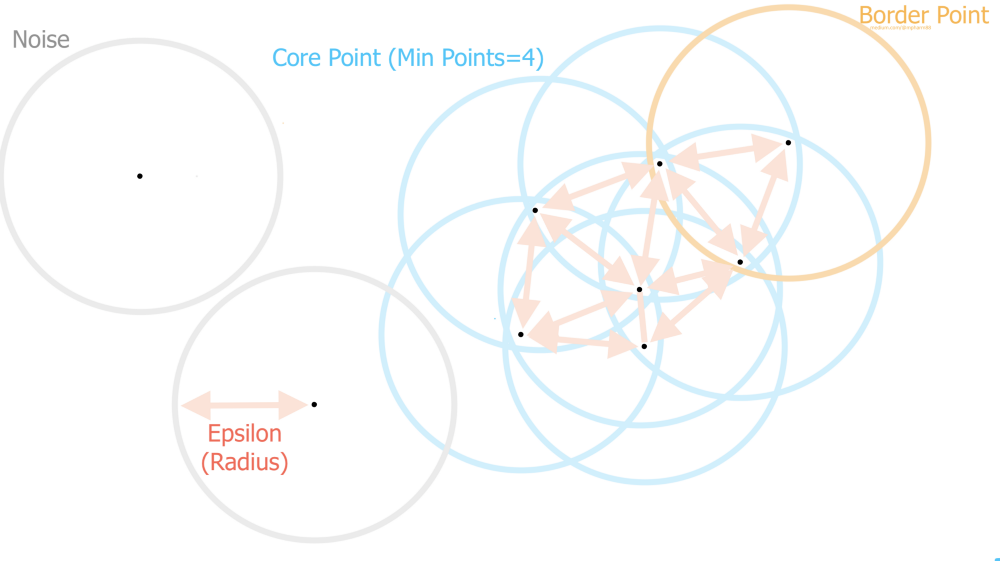
Image by Mikio Harman

</br>
From reference <a href="https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d">[2]</a>:

***Directly Density Reachable***: Data-point a is directly density reachable from a point b if —
1. |N (b)| ≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

Considering a border point and a core point, we can understand that notion of directly density reachable is not symmetric, because even though the core point falls in the epsilon neighborhood of border point, the border point doesn’t have enough MinPts, and thus fail to satisfy both conditions.

***Density Reachable***: Point a is density reachable from a point b with respect to ϵ and MinPts, if —
* For a chain of points b<sub>1</sub>, b<sub>2</sub>, ... b<sub>n</sub>, where b<sub>1</sub> = b and b<sub>n</sub> = a, such that b<sub>i+1</sub> is directly density reachable from b<sub>i</sub>.

* Density reachable is transitive in nature but, just like direct density reachable, it is not symmetric.

***Density Connected***: There can be cases when 2 border points will belong to the same cluster but they don't share a specific core point, then we say that they are density connected if, there exists a common core point, from which these borders points are density reachable. As you can understand that density connectivity is symmetric. Definition from the Ester et.al. paper is given below —

“A point a is density connected to a point b with respect to ϵ and MinPts, if there is a point c such that, both a and b are density reachable from c w.r.t. to ϵ and MinPts.” <a href="https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf">[3]</a>

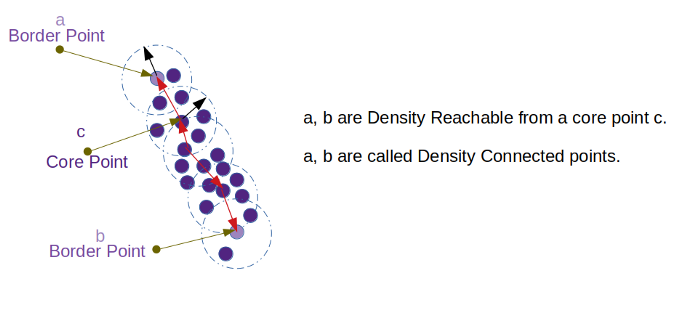
Epsilon = 1, Min_Points = 7

Image From Reference <a href="https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d">[2]</a>

***Advantages:***
1. It requires minimum domain knowledge <a href="https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf">[3]</a>.
2. It can discover clusters of arbitrary shape <a href="https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf">[3]</a>.
3. Efficient for large database, i.e. sample size more than few thousands <a href="https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf">[3]</a>.
4. The user does not need to know how many clusters exist in the data <a href="https://towardsdatascience.com/dbscan-with-python-743162371dca">[1]</a>.
5. DBSCAN works best when the clusters are of the same density (distance between points) <a href="https://towardsdatascience.com/dbscan-with-python-743162371dca">[1]</a>.
6. DBSCAN identifies outliers as noise, instead of classifying them into a cluster <a href="https://medium.com/@tarammullin/dbscan-2788cfce9389">[4]</a>.

***Disadvantages:***
1. DBSCAN algorithm fails in case of varying density clusters <a href="https://sites.google.com/site/dataclusteringalgorithms/density-based-clustering-algorithm">[6]</a>.
2. Fails in case of neck type of dataset <a href="https://sites.google.com/site/dataclusteringalgorithms/density-based-clustering-algorithm">[6]</a>.
3. Does not work well in case of high dimensional data <a href="https://sites.google.com/site/dataclusteringalgorithms/density-based-clustering-algorithm">[6]</a>.

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=50)

n_classes = int(np.amax(y)+1)
print("number of clusters is ",n_classes)
# SETUP & RUN A GRIDSEARCH

#SK LEARN
dbscan = skcl.pipeBuild_DBSCAN(eps=[30.5])

names=['DBSCAN']
pipes=[dbscan]

# NOTE: DBSCAN has a noise cluster labeled -1.  However for plotting purposese,
# the noise label is the highest numbered label.  Note that if DBSCAN is working
# well, it will have one more label (noise) that the test labels.  This makes
# DBSCAN hard to measdure its effectiveness since there will usuall be some
# noise data

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_mutual_info_score',plot_number=3)

number of clusters is  3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=nan):
{'dbscan__algorithm': 'auto', 'dbscan__eps': 30.5, 'dbscan__leaf_size': 30, 'dbscan__metric': 'euclidean', 'dbscan__metric_params': None, 'dbscan__min_samples': 5, 'dbscan__n_jobs': None, 'dbscan__p': None}
Best adjusted_mutual_info_scorescore:  nan
# of X's clusters is:  4
# of y's clusters is:  3


### Mean Shift

</br>

**References:**

1.   https://www.geeksforgeeks.org/ml-mean-shift-clustering/
2.   https://ml-explained.com/blog/mean-shift-explained
3.   https://scikit-learn.org/stable/modules/clustering.html#mean-shift

</br>

**Mean shift** is a non-parametric density based clustering algrorithm.  Like DBSCAN, the user does not need to tell the algorithm the number of clusters.  It is sometimes referred to as the **Mode-seeking algorithm**.
 <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>

 "Given a set of data points, the algorithm iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster."  <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>

 Essentially, the algorithm shifts each point toward the mode of a points within a certain radius.  <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a> 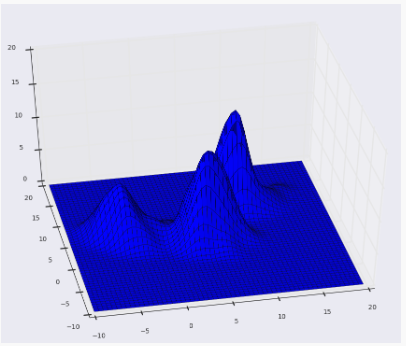

 **Example Surface Plot (image from <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>)**

**Bandwidth** is the primary parameter for mean shift clustering.  It is essentially the window size for the kernels.  In SKlearn, if no bandwith is chosen, the default is estimated use an SKlearn function called "estimate_bandwith" from the "cluster" package.  Note that choosing the bandwith is non-trivial and changing the bandwith size can lead to major differences in results. <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>, <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>, <a href="https://scikit-learn.org/stable/modules/clustering.html#mean-shift">[3]</a>

***High Level Mean Shift algorithm:***

* Initialize the data points as cluster centroids. <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* Repeat the following steps until convergence or a maximum number of iterations is reached: <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
  * For each data point, calculate the mean of all points within a certain radius (i.e., the “kernel”) centered at the data point.
  * Shift the data point to the mean. <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
  * Identify the cluster centroids as the points that have not moved after convergence. <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
  * Return the final cluster centroids and the assignments of data points to clusters. <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>

Mean shift used kernel density estimation (KDE) to estimate the underlying distribution (or probability density function) for the data set.  A kernal is placed on each data point, which is essentially a weighting funcion.  Adding these up creates the probability surface.  This varies depending on the kernel bandwith parameter.  <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>



***Advantages:***

* Finds variable number of modes <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* Robust to outliers <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* General, application-independent tool <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* Model-free, doesn't assume any prior shape like spherical, elliptical, etc. on data clusters <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>

  * Works very well for spherical-shaped data <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>
* Just a single parameter (window size h) where h has a physical meaning (unlike k-means) <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>


***Disadvantages:***

* Output depends on window size <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* Window size (bandwidth) selection is not trivial <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>, Works well for spherical-shaped data <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>
* Computationally (relatively) expensive <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>
* Doesn't scale well with dimension of feature space <a href="https://www.geeksforgeeks.org/ml-mean-shift-clustering/">[1]</a>, <a href="https://ml-explained.com/blog/mean-shift-explained">[2]</a>

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=50)

n_classes = int(np.amax(y)+1)
print("number of clusters is ",n_classes)

# SETUP & RUN A GRIDSEARCH

#SK LEARN
meanshift = skcl.pipeBuild_MeanShift(bandwidth=[None])

names=['Mean Shift Clustering']
pipes=[meanshift]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_mutual_info_score',plot_number=3)

number of clusters is  3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=0.014):
{'meanshift__bandwidth': None, 'meanshift__bin_seeding': False, 'meanshift__cluster_all': True, 'meanshift__max_iter': 300, 'meanshift__min_bin_freq': 1, 'meanshift__n_jobs': None, 'meanshift__seeds': None}
Best adjusted_mutual_info_scorescore:  0.01388676803787434
# of X's clusters is:  1
# of y's clusters is:  3


### OPTICS

</br>

**References:**

1.   https://www.geeksforgeeks.org/ml-optics-clustering-explanation/
2.   https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde

</br>

**Ordering Points To Identify the Clustering Structure (OPTICS)** is a density based algorithm that is similar to DBSCAN discussed in a previous section.  Unlike DBSCAN, it can extract clusters of varying shapes and densities and is particularly useful in large data sets with high-dimensionality.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>

OPTICS has the following concepts added of DBSCAN.

1.   "**Core Distance:** it is the minimum value of radius required to classify a given point as a core point. if the given point is not a Core point, then its Core Distance is undefined."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

2.   "**Reachability Distance:** it is defined with respect to another data point 'q'. The Reachability distance between a point *p* and *q*. Note that The Reachability Distance is not defined if 'q' is not a Core point."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>


Additionally, OPTICS uses K Nearest Neighbors approach instead of a radius measurement when determining core points


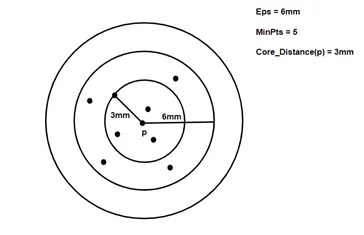

**Core Distance** (image from <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

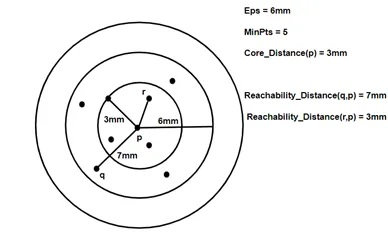

**Reachability Distance** (image from <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>)

**OPTICS algrothim steps:**

1. Define a density threshold parameter, Eps, which controls the minimum density of clusters.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>
2. For each point in the dataset, calculate the distance to its k-nearest neighbors.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>
3. Starting with an arbitrary point, calculate the reachability distance of each point in the dataset, based on the density of its neighbors.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>
4. Order the points based on their reachability distance and create the reachability plot.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>
5. Extract clusters from the reachability plot by grouping points that are close to each other and have similar reachability distances.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>

***Advantages:***

* "OPTICS clustering doesn't require a predefined number of clusters in advance."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

* "Clusters can be of any shape, including non-spherical ones."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

* "Able to identify outliers(noise data)."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

***Disadvantages:***

* "It fails if there are no density drops between clusters."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

* "It is also sensitive to parameters that define density( radius and the minimum number of points) and proper parameter settings require domain knowledge."  <a href="https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde">[2]</a>

* OPTICS requires more memory than DBSCAN and has a much higher runtime complexity (longer execution time).  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>

* Requires fewer parameters than DBSCAN.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>

*  Does not explicitly identify noise points, but points with high reachability distances can be considered noise.  <a href="https://www.geeksforgeeks.org/ml-optics-clustering-explanation/">[1]</a>

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=50)

n_classes = int(np.amax(y)+1)
print("number of classes is ",n_classes)
# SETUP & RUN A GRIDSEARCH

#SK LEARN
optics = skcl.pipeBuild_OPTICS(min_samples=[3,5,10,11],metric=['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'])#,eps=[0.03]) #160.52215

names=['OPTICS']
pipes=[optics]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_mutual_info_score',plot_number=3)

number of classes is  3
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameter (CV score=nan):
{'optics__algorithm': 'auto', 'optics__cluster_method': 'xi', 'optics__eps': None, 'optics__leaf_size': 30, 'optics__max_eps': inf, 'optics__memory': None, 'optics__metric': 'cityblock', 'optics__metric_params': None, 'optics__min_cluster_size': None, 'optics__min_samples': 3, 'optics__n_jobs': None, 'optics__p': 2, 'optics__predecessor_correction': True, 'optics__xi': 0.05}
Best adjusted_mutual_info_scorescore:  nan
# of X's clusters is:  26
# of y's clusters is:  3


## Hierarchical Clustering

</br>

**References:**


1.   https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/
2.   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
3.   https://www.geeksforgeeks.org/agglomerative-methods-in-machine-learning/
4.   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html
5.   https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/
6.   https://www.educba.com/hierarchical-clustering-agglomerative/

</br>

In hierarchical clustering, data is organized into a tree like structure known as a **dendrogram**.  There are two broad categories of this type of clustering, divisive ("top down") and agglomerative ("bottom up").  Divisive approaches start with every data element in a single cluster, and then iteratively breaks them apart.  Agglomerative starts with every element in its own cluster and iteratively combines them.  <a href="https://www.geeksforgeeks.org/agglomerative-methods-in-machine-learning/">[3]</a>



### Agglomerative



Agglomerative clusting if a type of bottom-up hierarchical clustering.  It is considered "bottom-up" because each element in the data set is initially considered a leaf.  Each cycle, the algorithm combines the leaves that are most similar into a cluster.  This process continues until all elements are combined into a single cluster called the root.  This creates the structure of the hierarcy.  <a href="https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/">[1]</a>

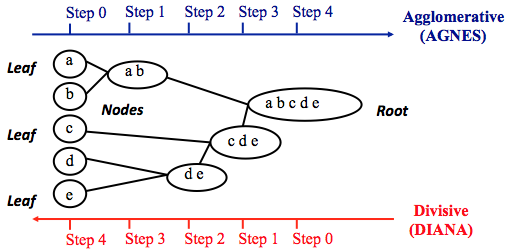

Figure from <a href="https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/">[1]</a>

**Parameters of note:** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">[2]</a>
*  **n_cluster:**number of clusters
*  **metric:** distance metric for the distance calculations. Euclidean, Manhattan, etc.
*  **linkage:** defines the approach used for calculating distance between clusters and is based on affinity.
  * **Ward:** minimizes variance between clusters
  * **Complete:** calculates the maximum value between all data points in two clusters
  * **Average:** calculates the average value of distances between two clusters
  * **Single:** calculates the minimum value of distances between two clusters

***Advantages***

1. "No need for information about how many numbers of clusters are required."  <a href="https://www.educba.com/hierarchical-clustering-agglomerative/">[6]</a>

2. "Easy to use and implement."  <a href="https://www.educba.com/hierarchical-clustering-agglomerative/">[6]</a>

***Disadvantages***

1. "We can not take a step back in this algorithm."  <a href="https://www.educba.com/hierarchical-clustering-agglomerative/">[6]</a>

2. "Time complexity is higher at least 0(n^2logn)."  <a href="https://www.educba.com/hierarchical-clustering-agglomerative/">[6]</a>

### Feature Agglomeration

Feature agglomeration is a dimensionality reduction technique based on agglerative clustering.  It essentially looks for the most important features in a dataset by grouping similar correlated features into clusters.  <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>


**Steps in feature agglomeration according to <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>:**

1.   "Each feature is considered as a separate cluster initially, if 'n' number of features are present then 'n' clusters will be formed."
2.   "After the above step distance between each feature clusters are measured by the affinity parameter which we mention while initializing the feature agglomeration."
3.   "In this step the grouping of the clusters happen, the closest clusters according to the distance are merged together into a single cluster and this step is repeated until only ‘n_clusters’ amount of clusters are left."
4.   "After each merge the pairwise distances are updated with the new clusters formed and the existing clusters."
5.   "The steps are repeated until the required number of clusters are achieved."
6.   "Once the stage of remaining 'n_clusters' is reached each cluster gets represented by a feature. The value of 'pooling' parameter determines the way in which the new features are going to be represented, for example if we set the value of pooling parameter of be 'mean' it will represent the mean value."
7.   "At last the original features are transformed by replacing the existing features with the new features that are formed by feature agglomeration."

**Parameters:** <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>
*  **n_cluster:**number of clusters
*  **affinity:** distance metric for the distance calculations. Euclidean, Manhattan, etc.
*  **linkage:** defines the approach used for calculating distance between clusters and is based on affinity.
  * **Ward:** minimizes variance between clusters
  * **Complete:** calculates the maximu value between all data points in two clusters
  * **Average:** calculates the average value of distances between two clusters
  * **Single:** calculates the minimum value of distances between two clusters
* **pooling_func:** method to combine the values of agglomerated features into the final cluster.  Mean, median, etc.

**Advantages and Disadvantages of Feature Agglomeration**

***Advantages***

* "As a main objective of feature agglomeration, it helps reducing the number of extra features in the dataset grouping similar features together and therefore reducing the complexity of data exploration." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>
* "Grouping of similar function may reduce the noise in the data and help in understanding better relationship in data." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>
* "Reduction of extra features may also improve the model performance." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>

***Disadvantages***

* "Feature agglomeration may reduce the descriptive information of the data present originally." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>
* "If the parameters of feature agglomeration not chosen wisely may result into loss of informative details about the data." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>
* "In some cases feature agglomeration might not provide significant benefits as compared to the original data which was present previously." <a href="https://www.geeksforgeeks.org/feature-agglomeration-in-scikit-learn/">[5]</a>

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=50)

n_classes = int(np.amax(y)+1)
print("number of clusters is ",n_classes)

# SETUP & RUN A GRIDSEARCH

#SK LEARN
agg = skcl.pipeBuild_AgglomerativeClustering(n_clusters=[n_classes],linkage=['ward','complete','average','single'],distance_threshold=[None])
featagg = skcl.pipeBuild_FeatureAgglomeration(n_clusters=[n_classes],linkage=['ward','complete','average','single'])

names=['Agglomerative Clustering','Feature Agglomeration']
pipes=[agg,featagg]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_mutual_info_score',plot_number=3)

number of clusters is  3
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=nan):
{'aggclust__affinity': 'deprecated', 'aggclust__compute_distances': False, 'aggclust__compute_full_tree': 'auto', 'aggclust__connectivity': None, 'aggclust__distance_threshold': None, 'aggclust__linkage': 'ward', 'aggclust__memory': None, 'aggclust__metric': None, 'aggclust__n_clusters': 3}
Best adjusted_mutual_info_scorescore:  nan
# of X's clusters is:  3
# of y's clusters is:  3


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=nan):
{'featagg__affinity': 'deprecated', 'featagg__compute_distances': False, 'featagg__compute_full_tree': 'auto', 'featagg__connectivity': None, 'featagg__distance_threshold': None, 'featagg__linkage': 'ward', 'featagg__memory': None, 'featagg__metric': None, 'featagg__n_clusters': 3, 'featagg__pooling_func': <function mean at 0x7b6f8f923770>}
Best adjusted_mutual_info_scorescore:  nan
# of X's clusters is:  3
# of y's clusters is:  3


## K Means

*Author: Soumya Pal*

*Updated: Stephen Coshatt*

<br/>

**References:**

1.   https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0
2.   https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html#tslearn.clustering.TimeSeriesKMeans
3.   https://medium.com/udemy-engineering/understanding-k-means-clustering-and-kernel-methods-afad4eec3c11#:~:text=Hence%2C%20this%20article%20explains%20more,example%20being%20support%20vector%20machines.



k-means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster's centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.

**K-Means Pseudo Code**

Assign initial values for each u (from *u=1* till *u=k*);</br>
Repeat {
*   Assign each point in the input data to the *u* that is closest to it in value;
*   Calculate the new mean for each *u*;
*   if all *u* values are unchanged { break out of loop; }</br>
}

The algorithm starts by placing k different averages (i.e. means) whose values are either initialized randomly or set to real data points on the plane <a href="https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0">[1]</a>.  Next, the algorithm goes through the data points one-by-one, measuring the distance between each point and the centroids. The algorithm then groups the the data point with the closest centroid (i.e. closest in distance) <a href="https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0">[1]</a>.  This grouping forms the clusters.
</br>
</br>

**When K-Means may not perform well:** <a href="https://medium.com/udemy-engineering/understanding-k-means-clustering-and-kernel-methods-afad4eec3c11#:~:text=Hence%2C%20this%20article%20explains%20more,example%20being%20support%20vector%20machines.">[3]</a>

*   Clusters are non-spherical
*   Clusters have different sizes
*   Data has outliers
*   Clusters are non-linearly separable
*   Clusters have overlap
*   Cluster centroids have poor initialization

</br>
</br>

**Pros:**
*   Simple: It is easy to implement k-means and identify unknown groups of data from complex data sets.
*   Flexible: K-means algorithm can easily adjust to the changes. If there are any problems, adjusting the cluster segment will allow changes to easily occur on the algorithm.
*   Suitable in a large dataset: K-means is suitable for a large number of datasets and it's computed much faster than the smaller dataset.
*   Efficient: The algorithm used is good at segmenting the large data set. Its efficiency depends on the shape of the clusters. K-means work well in hyper-spherical clusters.
*   Easy to interpret: The results are easy to interpret. It generates cluster descriptions in a form minimized to ease understanding of the data.

**Cons:**
*   No-optimal set of clusters: K-means doesn't allow development of an optimal set of clusters and for effective results, clusters has to be decided beforehand.
*   Handle numerical data: K-means algorithm can be performed on numerical data only.
*   Lacks consistency: K-means clustering gives varying results on different runs of an algorithm. A random choice of cluster patterns yields different clustering results resulting in inconsistency.
*   Sensitivity to scale: Changing or rescaling the dataset either through normalization or standardization will completely change the final results.

### Bisection K-Means

**Reference:**
  
1.   https://scikit-learn.org/stable/modules/clustering.html#bisect-k-means


Bisection k-means is a variation of the original k-means algorithm.  It uses divisive heirarchical clustering to progressively pick centroids based on previous clustering rather than creating them all at once. <a href="https://scikit-learn.org/stable/modules/clustering.html#bisect-k-means">[1]</a>

Bisection k-means is more efficient that k-means when the number of clusters is large.  This is because it work on a subset of data at each bisection rather than the entire dataset.  <a href="https://scikit-learn.org/stable/modules/clustering.html#bisect-k-means">[1]</a>

Note that this varian cannot produce empty clusters. <a href="https://scikit-learn.org/stable/modules/clustering.html#bisect-k-means">[1]</a>

### Kernel K-Means

**References:**


1.   https://medium.com/udemy-engineering/understanding-k-means-clustering-and-kernel-methods-afad4eec3c11#:~:text=Hence%2C%20this%20article%20explains%20more,example%20being%20support%20vector%20machines.  
2.   https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.KernelKMeans.html
3.   https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm
4.   https://scikit-learn.org/stable/modules/metrics.html


Kernel K-Means uses kernels to calculate distance instead of the Euclidean distance.  <a href="https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm">[3]</a>
Kernels are measures of similarity <a href="https://scikit-learn.org/stable/modules/metrics.html">[4]</a>.  It otherwise uses the same algorithm as the standard k-means.

</br>

***Note:*** SKLearn offers a variety of kernels.  See refernece <a href="https://scikit-learn.org/stable/modules/metrics.html">[4]</a> for a list of kernels available.

</br>

**Advantages**

1. Algorithm is able to identify the non-linear structures. <a href="https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm">[3]</a>
2. Algorithm is best suited for real life data set. <a href="https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm">[3]</a>

**Disadvantages**

1. Number of cluster centers need to be predefined. <a href="https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm">[3]</a>
2. Algorithm is complex in nature and time complexity is large. <a href="https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm">[3]</a>

### Mini-Batch K-Means

**References:**


*   https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans
*   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

</br>

This varian of k-means uses a subset of data, called mini-batches, to reduce computation time <a href="https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans">[1]</a>.  Mini-batches are randomly sampled in each training iteration <a href="https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans">[1]</a>.  Centroid are updated per batch vs per data point of k-means.

Mini-batch k-means is faster, but produces slightly lower quality results.  <a href="https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans">[1]</a>

### Time Series K-Means

**References:**
1. https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.KernelKMeans.html

</br>

This a a TSLearn variation of k-means optimized for time series data.  This is done by using Dynamic Time Warping (DTW) as a metric for similarity, which has shown to be effective for time series data, instead of the Euclidean distance.  Otherwise the algorithm works the same as the standard K-Means.

### **K-Shape**

**References**

1.   http://www1.cs.columbia.edu/~jopa/Papers/PaparrizosSIGMOD2015.pdf
2.   https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.KShape.html

</br>

"K-Shape is a centroid-based clustering algorithm that can preserve the shapes of time-series sequences. K-Shape relies on a scalable iterative refinement procedure, which creates homogeneous and well-separated clusters. As its distance measure, k-Shape uses a normalized version of the cross-correlation
measure in order to consider the shapes of time series while comparing them" <a href="http://www1.cs.columbia.edu/~jopa/Papers/PaparrizosSIGMOD2015.pdf">[1]</a>.   K-Shape is based on a scalable iterative refinement procedure similar to the one used by the k-means algorithm, but with significant differences. Specifically, k-Shape uses both a different distance measure and a different method for centroid computation from those of k-means. k-Shape attempts to preserve the shapes of time-series sequences while comparing them. To do so, k-Shape requires a distance measure that is invariant to scaling and shifting. Unlike other clustering approaches, for k-Shape we adapt the cross-correlation statistical measure and we show: (i) how we can derive in a principled manner a time-series distance measure that is scale- and shift-invariant; and (ii) how this distance measure can be computed efficiently. Based on the properties of the normalized version of cross-correlation, we develop a novel method to compute cluster centroids, which are used in every iteration to update the assignment of time series to clusters.



**k-Shape Algorithms:**

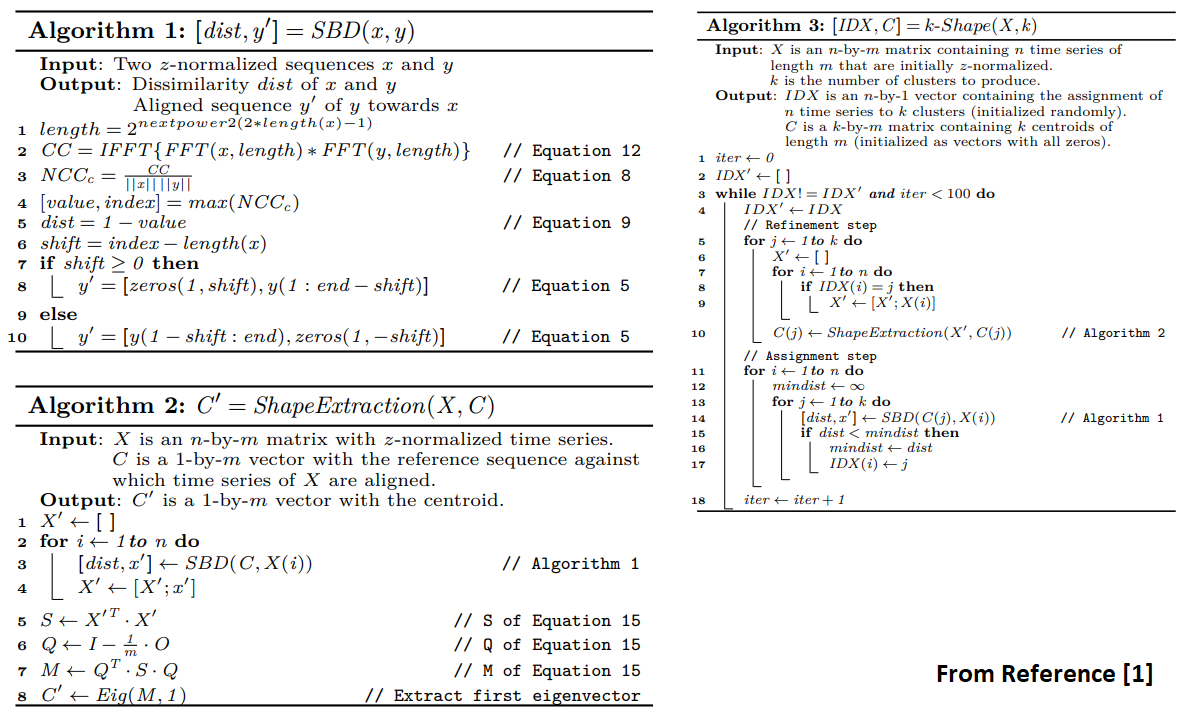

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=50)

n_classes = int(np.amax(y)+1)
print("number of clusters is ",n_classes)
# SETUP & RUN A GRIDSEARCH

#SK LEARN
kmeans = skcl.pipeBuild_KMeans(n_clusters=[n_classes])
minikmeans = skcl.pipeBuild_MiniBatchKMeans(n_clusters=[n_classes])
bikmeans = skcl.pipeBuild_BisectingKMeans(n_clusters=[n_classes])

#TS LEARN
kernelKmeans = skcl.pipeBuild_KernelKMeans(n_clusters=[n_classes])
tskmeans = skcl.pipeBuild_TimeSeriesKMeans(n_clusters=[n_classes])
kshape = skcl.pipeBuild_KShape(n_clusters=[n_classes])

#names=['K Means','Bisecting K-Means','Kernel K Means','Mini-Batch K-Means','Time Series K Means','K Shape']
#pipes=[kmeans,bikmeans,kernelKmeans,minikmeans,tskmeans,kshape]

names=['K Means','Bisecting K-Means','Kernel K Means','Mini-Batch K-Means','K Shape']
pipes=[kmeans,bikmeans,kernelKmeans,minikmeans,kshape]

#names=['K Means']
#pipes=[kmeans]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='adjusted_rand_score',plot_number=3) #scoring='adjusted_mutual_info_score'

number of clusters is  3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.000):
{'kmeans__algorithm': 'lloyd', 'kmeans__copy_x': True, 'kmeans__init': 'k-means++', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 3, 'kmeans__n_init': 10, 'kmeans__tol': 10000.0, 'kmeans__verbose': 0}
Best adjusted_rand_scorescore:  -0.00010099355017123695
# of X's clusters is:  3
# of y's clusters is:  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=0.019):
{'bikmeans__algorithm': 'lloyd', 'bikmeans__bisecting_strategy': 'biggest_inertia', 'bikmeans__copy_x': True, 'bikmeans__init': 'random', 'bikmeans__max_iter': 300, 'bikmeans__n_clusters': 3, 'bikmeans__n_init': 1, 'bikmeans__tol': 0.0001, 'bikmeans__verbose': 0}
Best adjusted_rand_scorescore:  0.019203807919160255
# of X's clusters is:  3
# of y's clusters is:  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits


## Spectral Clustering
*Author: Soumya Pal*

*Updated: Stephen Coshatt*

</br>

**References:**

1.   https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/
2.   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
3.   https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf

</br>

Spectral clustering is a way to cluster data that has a number of benefits and applications. It relies on the eigenvalue decomposition of a matrix, which is a useful factorization theorem in matrix theory. It is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

Pros
*   Clusters are not assumed to be any certain shape/distribution, in contrast to say k-means. This means the spectral clustering algorithm can perform well with a wide variety of shapes of data.
*   Works quite well when relations are approximately transitive (like similarity)

Cons
*   Need to choose the number of clusters k, although there is a heuristic to help choose
*   Can be costly to compute, although there are algorithms and frameworks to help
*   For very large datasets computing eigenvectors is computationally expensive and becomes the bottleneck





**Types of Similarity Graphs used in Spectral Clustering:**


**The ε-neighborhood graph:** Here we connect all points whose pairwise distances are smaller than ε.  As the distances between all connected points are roughly of the same scale (at most ε), weighting the edges would not incorporate more information about the data to the graph. Hence, the ε-neighborhood graph is usually considered as an unweighted graph. <a href="https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf">[3]</a>

**K-nearest neighbor graphs:** Here the goal is to connect vertex vi with vertex vj if vj is among the k-nearest neighbors of vi. However, this definition leads to a directed graph, as the neighborhood relationship is not symmetric. There are two ways of making this graph undirected. The first way is to simply ignore the directions of the edges, that is we connect vi and vj with an undirected edge if vi is among the k-nearest neighbors of vj or if vj is among the k-nearest neighbors of vi. The resulting graph is what is usually called the k-nearest neighbor graph. The second choice is to connect vertices vi and vj if both vi is among the k-nearest neighbors of vj and vj is among the k-nearest neighbors of vi. The resulting graph is called the mutual k-nearest neighbor graph. In both cases, after connecting the appropriate vertices we weight the edges by the similarity of their endpoints. <a href="https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf">[3]</a>

**The fully connected graph:** Here we simply connect all points with positive similarity with each other, and we weight all edges by sij . As the graph should represent the local neighborhood relationships, this construction is only useful if the similarity function itself models local neighborhoods. An example for such a similarity function is the Gaussian similarity function s(xi, xj ) = exp(-(xi - xj(2/(2σ2)), where the parameter σ controls the width of the neighborhoods. This parameter plays a similar role as the parameter ε in case of the ε-neighborhood graph. <a href="https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf">[3]</a>

**Graph Laplacians**

The main tools for spectral clustering are graph Laplacian matrices. <a href="https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf">[3]</a>

The **unnormalized** graph Laplacian L = D - W   <a href="https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/">[1]</a>

The **normalized** graph Laplacians- There are two matrices which are called normalized graph Laplacians in the literature. Both matrices are closely related to each other and are defined as Lsym := D-1/2LD-1/2 = I - D-1/2W D-1/2
Lrw := D-1L = I - D-1W.  <a href="https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/">[1]</a>

We denote the first matrix by Lsym as it is a symmetric matrix, and the second one by Lrw as it is closely related to a random walk Eigenvectors and Eigenvalues.  <a href="https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/">[1]</a>

**Common Spectral Clustering Algorithms <a href="https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf">[3]</a>**

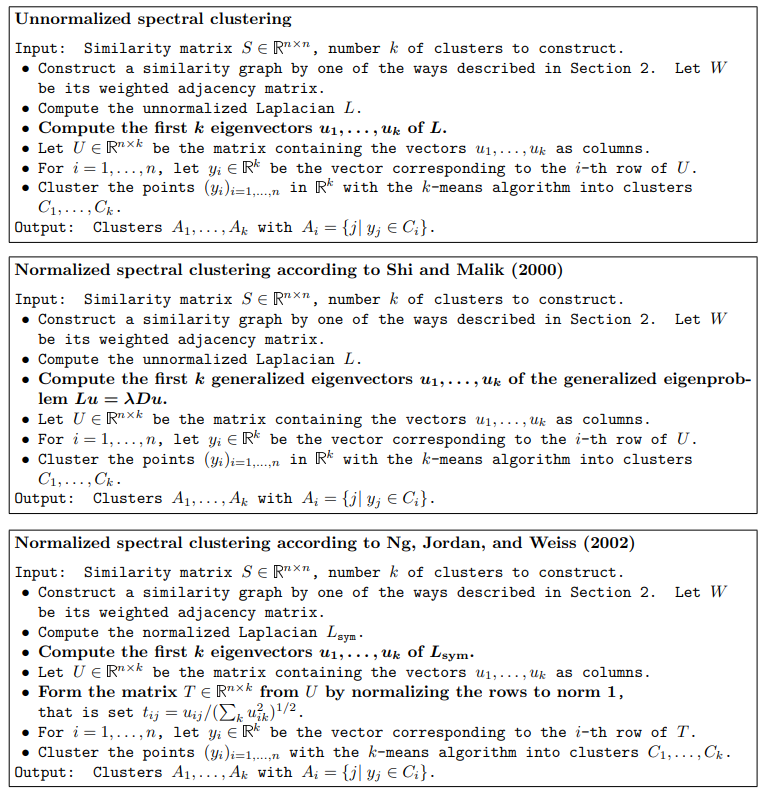

**Graph cut [1]**

We wish to partition the graph G(V, E) into two disjoint sets of connected vertices A and B: by simply removing edges connecting two parts.

We define the degree di of a vertex i as the sum of edges weights incident to it: The degree matrix of the graph G denoted by will be a diagonal matrix having the elements on its diagonal and the off-diagonal elements having value 0.

Given two disjoint clusters (subgraphs) A and B of the graph G, we define the following three terms:

*   The sum of weight connections between two clusters:
*   The sum of weight connections within cluster A:
*   The total weights of edges originating from cluster A

In graph theory, there are different objective functions:

*   Minimum cut method
*   Ratio cut method
*   Normalized cut method
*   MinMaxCut cut method

In [5]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the classifier builders from the cloned python files
import lib.clustering as skcl

x, y = generate_class_data(wave_number=30)

n_classes = int(np.amax(y)+1)
print("number of classes is ",n_classes)

# SETUP & RUN A GRIDSEARCH

#SK LEARN
spectral = skcl.pipeBuild_SpectralClustering(n_clusters=[n_classes],
                  eigen_solver=[None,'arpack','lobpcg','amg'],
                  affinity=['nearest_neighbors','rbf','laplacian','sigmoid','cosine'],
                  gamma=[0.25,0.5,0.75,1.0])

names=['Spectral']
pipes=[spectral]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
skcl.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,scoring='rand_score',plot_number=3)

number of classes is  3
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameter (CV score=nan):
{'specclust__affinity': 'nearest_neighbors', 'specclust__assign_labels': 'kmeans', 'specclust__coef0': 1, 'specclust__degree': 3, 'specclust__eigen_solver': None, 'specclust__eigen_tol': 'auto', 'specclust__gamma': 0.25, 'specclust__kernel_params': None, 'specclust__n_clusters': 3, 'specclust__n_components': None, 'specclust__n_init': 10, 'specclust__n_jobs': None, 'specclust__n_neighbors': 10, 'specclust__verbose': False}
Best rand_scorescore:  nan
# of X's clusters is:  3
# of y's clusters is:  3


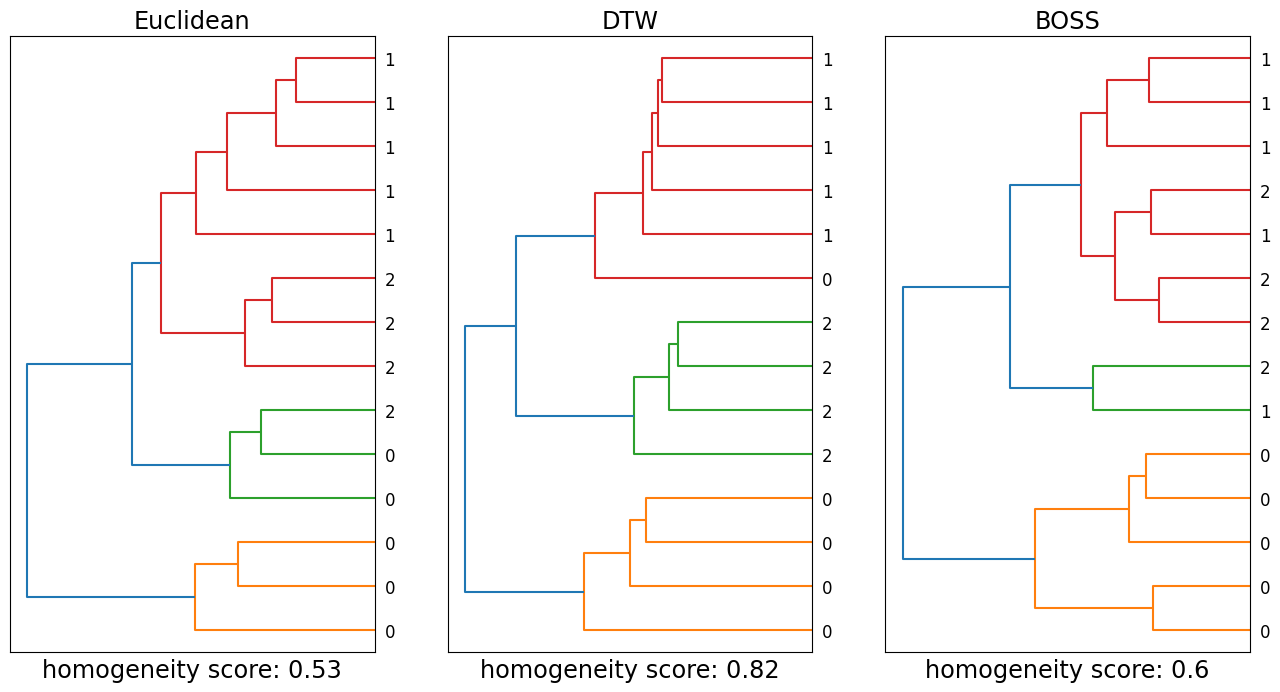

In [ ]:
# Author: Lucas Plagwitz <lucas.plagwitz@uni-muenster.de>
# License: BSD-3-Clause

import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import homogeneity_score
from sklearn.cluster import AgglomerativeClustering

from pyts.metrics import dtw, boss
from pyts.transformation import BOSS
from pyts.datasets import make_cylinder_bell_funnel


def create_dist_matrix(dataset, dist_func, **kwargs):
    distance_mat = np.zeros((len(dataset), len(dataset)))
    for i, j in itertools.product(range(len(dataset)),
                                  range(len(dataset))):
        distance_mat[i, j] = dist_func(dataset[i], dataset[j], **kwargs)
    return distance_mat


def plot_dendrogram(model, **kwargs):
    # function copied from sklearn:
    # plot_agglomerative_dendrogram.html
    #
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,
               color_threshold=sorted(model.distances_)[-2], **kwargs)


n_samples = 14
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

X, y = make_cylinder_bell_funnel(n_samples=n_samples, random_state=42,
                                 shuffle=False)
for k_axis, metric in enumerate(["Euclidean", "DTW", "BOSS"]):
    if metric == "DTW":
        dist_mat = create_dist_matrix(X, dtw)
    elif metric == "BOSS":
        dist_mat = create_dist_matrix(BOSS(sparse=False, n_bins=3,
                                           word_size=3).fit_transform(X),
                                      boss)
    else:
        dist_mat = create_dist_matrix(X, euclidean)

    model = AgglomerativeClustering(compute_full_tree=True,
                                    compute_distances=True,
                                    n_clusters=3, metric="precomputed",
                                    linkage="complete")
    cluster = model.fit_predict(dist_mat)
    score = round(homogeneity_score(labels_true=y, labels_pred=cluster), 2)

    plot_dendrogram(model, orientation='left', ax=axes[k_axis], labels=y)
    axes[k_axis].set_xticks([], [])
    axes[k_axis].set_title(metric, size='xx-large')
    axes[k_axis].set_xlabel(f"homogeneity score: {score}", size='xx-large')

plt.show()

# Anomaly Detection

"**Anomaly Detection** is the technique of identifying rare events or observations which can raise suspicions by being statistically different from the rest of the observations." <a href="https://www.geeksforgeeks.org/machine-learning-for-anomaly-detection/">[1]</a>

Anomaly detection can be supervised, unsupervised, or semi-supervised.

There are two broad categories of anomaly detection, **outlier detection** and **novelty detection**.

</br>

**References**

1.   https://www.geeksforgeeks.org/machine-learning-for-anomaly-detection/

## Outlier Detection

In outlier detection, you are looking for anomalies that may lie within your current dataset. [2] Outlier detection is an unsupervised approach. It is used when you suspect there is anomalous data points that you wish to remove prior to using the data.

## Novelty Detection

In novelty detection, you are planning on identifying anomalies that may exist in new data. Novely detection is either supervised or semi-supervised.

## Local Outlier Factor

Sklearn LOF source code: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

Local Outlier Factor (LOF) is an unsupervised method of outlier detection. An anomaly score, called the local outlier factor, is generated for each input sample.  The LOF is a measure of an samples deviation fo the density with respect to its neighbors [3].  The lower the density score, the more likely that the sample is an outlier.  Neighbors are loosely defined as the previous samples that are closest to the current one.  A "nearest neighbors" algorithm is used to generate neighborhoods.  For more information on trees, see the "Nearest Neighbors" subsection under "Classification."

In Sklearn, the LOF algorithm has two modes, one for outliers and one for novelties.  Here we only discuss the outlier mode.  For more details on the novelty mode, see the* Local Outlier Factor with Novelties* section below.


**Sklearn parameters of note:**

**n_neighbors** - this is a variable for the number of neighbors to use for a comparison.

**algorithm** - this is a variable for choosing the algorithm to be used to generate neighborhoods. The options are 'auto', 'ball_tree','kd_tree','brute'.  Note that 'auto' selects the best method based on the parameters passed by the user.

**metric** - this variable to for the distance metric that will be used. 'euclidean' is one of the most common, but Sklearn offers a large number of options for distance metrics.  They are all listed here: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html


In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_anomaly_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the anomaly detector builders from the cloned python files
import lib.detection as skn
#import sk_grid_builder as sgb

x, y = generate_anomaly_data(wave_number=50)
print("Lenghth ",len(x[0]))

n_classes = int(np.amax(y)+1)
print("number of classes is ",n_classes)

lof = skn.pipeBuild_LocalOutlierFactor(algorithm=['ball_tree','kd_tree'],novelty=[False])

names=['LOF']
pipes=[lof]

# Build and run a grid search for anomaly detectors.  Outputs best model and heat map of each type.
skn.gridsearch_outlier(names=names,pipes=pipes,X=x,y=y,plot_number=3)
#skn.gridsearch_clustering(names=names,pipes=pipes,X=x,y=y,plot_number=3)

Lenghth  1000
number of classes is  2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=nan):
{'lof__algorithm': 'ball_tree', 'lof__contamination': 'auto', 'lof__leaf_size': 30, 'lof__metric': 'minkowski', 'lof__metric_params': None, 'lof__n_jobs': None, 'lof__n_neighbors': 20, 'lof__novelty': False, 'lof__p': 2}
Best neg_mean_squared_errorscore:  nan
# of X's clusters is:  2
# of y's clusters is:  2


In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_anomaly_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the anomaly detector builders from the cloned python files
import lib.detection as skn
#import sk_grid_builder as sgb

x, y = generate_anomaly_data(wave_number=50)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

lofn = skn.pipeBuild_LocalOutlierFactor(algorithm=['ball_tree','kd_tree'],novelty=[True])

names=['LOF Novelty']
pipes=[lofn]

# Build and run a grid search for anomaly detectors.  Outputs best model and heat map of each type.
skn.gridsearch_outlier(names=names,pipes=pipes,X=x,y=y,plot_number=3)

number of classes is  2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.660):
{'lof__algorithm': 'ball_tree', 'lof__contamination': 'auto', 'lof__leaf_size': 30, 'lof__metric': 'minkowski', 'lof__metric_params': None, 'lof__n_jobs': None, 'lof__n_neighbors': 20, 'lof__novelty': True, 'lof__p': 2}
Best neg_mean_squared_errorscore:  -0.6599999999999999
# of X's clusters is:  2
# of y's clusters is:  2


## Isolation Forests ##

An **isolation forest** is an unsupervised machine learning algorithm for anomaly detection based on the Decision Tree algorithm. It uses an ensemble approach.

It randomly selects features from the data set and the randomly selects a split point between the minimum and maximum values of the selected feature.  This approach will create short paths to anomalous data points. [1]

Thus Isolation Forests begin by identifying outliers without attempting to first establish what is normal.  Additionally, it does not use a distance measure that is typical of other algorithms. [1]

It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data. [1]

It assumes "that anomalies are observations that are few and different, which should make them easier to identify. Isolation Forest uses an ensemble of Isolation Trees for the given data points to isolate anomalies." [1]

An ensemble of decision trees is created to classify data points. Each tree is built using different subsets of the input features, similar to the random forest classifier. It divides the data space into **“n buckets”** to build each tree.  Higher anomaly scores are given to data points that require fewer splits to become isoslated. [2]
</br> </br>


**Pros:**
* Faster than other algorithms due to lack of distance or density measures [1] [2]
* Works well on small datasets [1]
* Popular algorithm [2]
* Linear time complexity mean low computational resources [2]
* Work well with high dimensional problems with irrelevant attributes [2]

**Cons:**
* Algorithm cannot identify local anomaly points which can lower accuracy [2]
* Since it is unsupervised, it can be difficult to determine if the algoritm is working correctly [2]

</br> </br>

**References:**
1. https://www.digitalocean.com/community/tutorials/anomaly-detection-isolation-forest
2. https://medium.com/mlthinkbox/anomaly-detection-with-isolation-forest-in-scikit-learn-99417dcc3971

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_anomaly_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the anomaly detector builders from the cloned python files
import lib.detection as skn
#import sk_grid_builder as sgb

x, y = generate_anomaly_data(wave_number=50)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

iso = skn.pipeBuild_IsolationForest(n_estimators=[50,100])

names=['Isolation Forest']
pipes=[iso]

# Build and run a grid search for anomaly detectors.  Outputs best model and heat map of each type.
skn.gridsearch_outlier(names=names,pipes=pipes,X=x,y=y,plot_number=3)

number of classes is  2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-1.940):
{'isofrst__bootstrap': False, 'isofrst__contamination': 'auto', 'isofrst__max_features': 1.0, 'isofrst__max_samples': 'auto', 'isofrst__n_estimators': 50, 'isofrst__n_jobs': None, 'isofrst__verbose': 0, 'isofrst__warm_start': False}
Best neg_mean_squared_errorscore:  -1.94
# of X's clusters is:  2
# of y's clusters is:  2
